In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [42]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_redundant=0)

In [43]:
X

array([[-1.19734332, -1.14870732],
       [-0.51540647,  0.96091401],
       [-1.50067309,  0.36891042],
       ...,
       [-1.64781477, -1.43417094],
       [ 0.84600191, -0.08126359],
       [-1.30053297, -1.18270856]])

<Axes: xlabel='0', ylabel='1'>

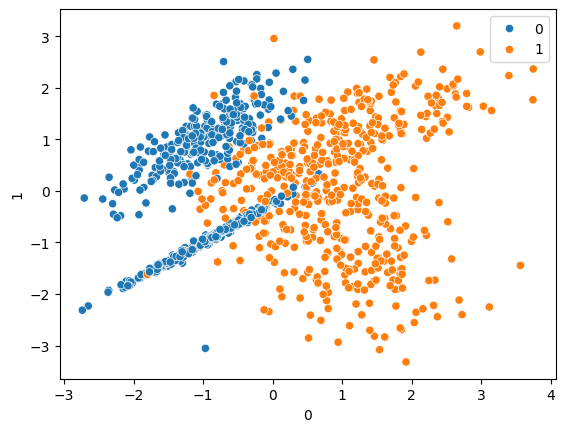

In [44]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC(kernel='linear')

In [49]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [50]:
svc.coef_

array([[ 2.31037253, -0.30293126]])

In [51]:
y_pred=svc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.912
[[112   8]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       120
           1       0.94      0.89      0.91       130

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



hyper tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter={
    'C': [1,2,3,5,10,100],
    'gamma':[1,0.1,0.01],
}

In [57]:
grid=GridSearchCV(SVC(),param_grid=parameter,refit=True,verbose=3,cv=5)

In [58]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.927 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.953 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.927 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.900 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.960 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.933 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.927 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.880 total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.920 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.913 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 5, 10, 100], 'gamma': [1, 0.1, 0.01]},
             verbose=3)

In [59]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [60]:
y_pred=grid.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.94
[[111   9]
 [  6 124]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       120
           1       0.93      0.95      0.94       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

